# Step 1: Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from math import *
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 2: Import the dataset

Import the dataset Dataset

In [3]:
data= pd.read_csv('/content/drive/MyDrive/apprentissage_supervise/train.csv')

first five rows of the Dataset

In [4]:
data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


Nombre de ligne et colonne

In [5]:
print('Nombre de ligne :', data.shape[0], 'Nombre de colonne',data.shape[1])

Nombre de ligne : 297177 Nombre de colonne 7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 297177 non-null  object 
 1   Datetime           297177 non-null  object 
 2   Sensor1_PM2.5      293563 non-null  float64
 3   Sensor2_PM2.5      293563 non-null  float64
 4   Temperature        293628 non-null  float64
 5   Relative_Humidity  293628 non-null  float64
 6   Offset_fault       297177 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ MB


Columns name

In [7]:
data.columns

Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Offset_fault'],
      dtype='object')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sensor1_PM2.5,293563.0,40.751195,28.526182,-9.45,22.43,36.47,49.42,997.96
Sensor2_PM2.5,293563.0,38.183018,28.647761,-9.70,19.52,33.72,47.57,997.26
Temperature,293628.0,23.316554,3.836971,16.70,20.40,21.90,26.30,34.90
Relative_Humidity,293628.0,78.653623,14.772725,27.00,68.00,84.00,91.00,99.00
Offset_fault,297177.0,0.371072,0.483092,0.00,0.00,0.00,1.00,1.00


Type de variable

In [9]:
data.dtypes.value_counts()

float64    4
object     2
int64      1
dtype: int64

In [10]:
"""sns.countplot(y=data.dtypes ,data=data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()"""

'sns.countplot(y=data.dtypes ,data=data)\nplt.xlabel("count of each data type")\nplt.ylabel("data types")\nplt.show()'

# Data Visualisation

Examen de la colonne target

In [11]:
data['Offset_fault'].value_counts()

0    186903
1    110274
Name: Offset_fault, dtype: int64

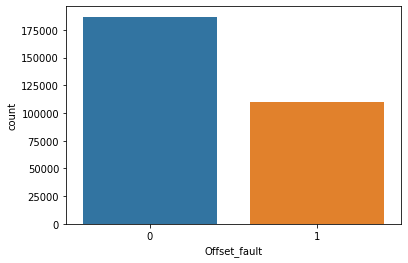

0    0.628928
1    0.371072
Name: Offset_fault, dtype: float64


In [12]:
# Visualize with a countplot
sns.countplot(x="Offset_fault", data=data)
plt.show()

# Print the proportions
print(data["Offset_fault"].value_counts(normalize=True))

In [13]:
print(data["Offset_fault"].value_counts(normalize=True)*100)

0    62.892821
1    37.107179
Name: Offset_fault, dtype: float64


Examen des features

<Figure size 432x288 with 0 Axes>

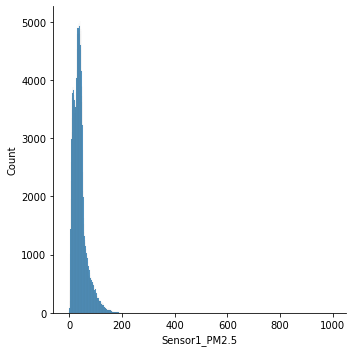

<Figure size 432x288 with 0 Axes>

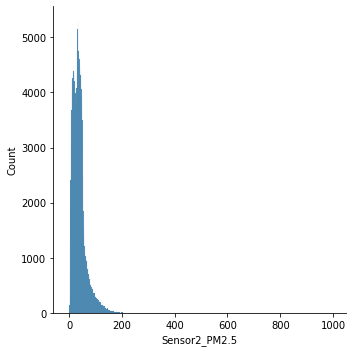

<Figure size 432x288 with 0 Axes>

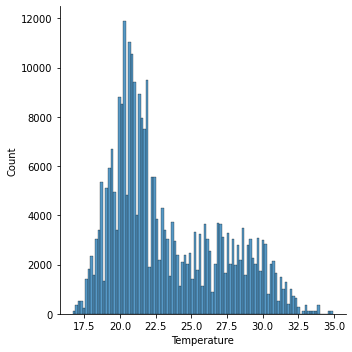

<Figure size 432x288 with 0 Axes>

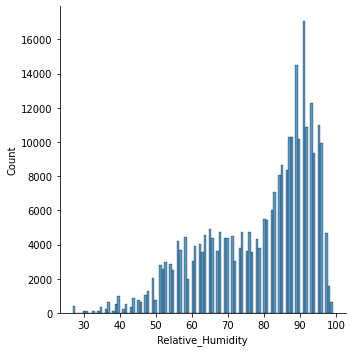

In [14]:
for f in data.select_dtypes('float'):
  plt.figure()
  sns.displot(data[f])

# Step 3: Taking care of the missing data

In [15]:
data.isnull().sum().sum()

14326

In [16]:
data.isnull().sum()

ID                      0
Datetime                0
Sensor1_PM2.5        3614
Sensor2_PM2.5        3614
Temperature          3549
Relative_Humidity    3549
Offset_fault            0
dtype: int64

In [17]:
#Pourcentage des valeurs null
miss_vals = pd.DataFrame(data.isnull().sum() / len(data) * 100)
print(miss_vals)

                          0
ID                 0.000000
Datetime           0.000000
Sensor1_PM2.5      1.216110
Sensor2_PM2.5      1.216110
Temperature        1.194238
Relative_Humidity  1.194238
Offset_fault       0.000000


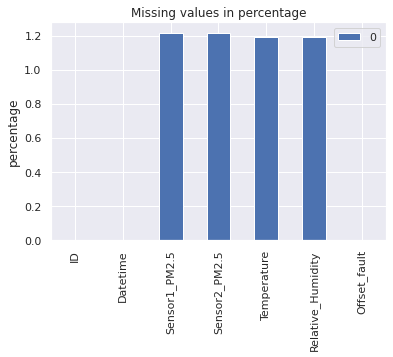

In [18]:
sns.set()
miss_vals = pd.DataFrame(data.isnull().sum() / len(data) * 100)
miss_vals.plot(kind='bar',title='Missing values in percentage',ylabel='percentage')


In [19]:
data = data.dropna()
print(data.shape)
data = data.iloc[0:5000,:]
print(data.shape)

(290014, 7)
(5000, 7)


In [20]:
"""data['Sensor1_PM2.5'].fillna(value=data['Sensor1_PM2.5'].mean(), inplace=True)
data['Sensor2_PM2.5'].fillna(value=data['Sensor2_PM2.5'].mean(), inplace=True)
data['Temperature'].fillna(value=data['Temperature'].mean(), inplace=True)
data['Relative_Humidity'].fillna(value=data['Relative_Humidity'].mean(), inplace=True)"""

"data['Sensor1_PM2.5'].fillna(value=data['Sensor1_PM2.5'].mean(), inplace=True)\ndata['Sensor2_PM2.5'].fillna(value=data['Sensor2_PM2.5'].mean(), inplace=True)\ndata['Temperature'].fillna(value=data['Temperature'].mean(), inplace=True)\ndata['Relative_Humidity'].fillna(value=data['Relative_Humidity'].mean(), inplace=True)"

In [21]:
data.isnull().sum().sum()

0

In [22]:
data.isnull().sum()


ID                   0
Datetime             0
Sensor1_PM2.5        0
Sensor2_PM2.5        0
Temperature          0
Relative_Humidity    0
Offset_fault         0
dtype: int64

# Feature Selection

Variance

In [23]:
data.var(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Sensor1_PM2.5        656.076419
Sensor2_PM2.5        670.922279
Temperature           15.175321
Relative_Humidity    221.698813
Offset_fault           0.234070
dtype: float64

In [24]:
data = data.drop('ID',1)
data = data.drop('Datetime',1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,52.58,49.52,17.4,96.0,0
1,35.25,33.40,25.0,75.0,0
2,19.18,23.50,24.9,75.0,0
3,19.40,15.48,24.9,70.0,0
4,38.30,34.77,20.9,89.0,0


Dependance

In [25]:
data.corr()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
Sensor1_PM2.5,1.000000,0.942066,-0.450542,0.395172,-0.179389
Sensor2_PM2.5,0.942066,1.000000,-0.415067,0.361322,-0.328702
Temperature,-0.450542,-0.415067,1.000000,-0.935148,-0.002030
Relative_Humidity,0.395172,0.361322,-0.935148,1.000000,0.002158
Offset_fault,-0.179389,-0.328702,-0.002030,0.002158,1.000000


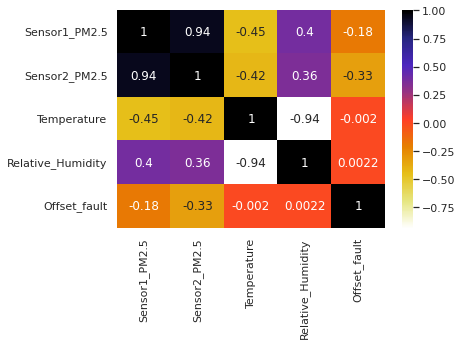

In [26]:
#plt.figure(figsize=(12,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

# Normalisation

In [27]:
def scale(X):
    means = X.mean(0)
    stds = X.std(0)
    return (X - means)/stds


In [28]:
data.iloc[:,:-1]= scale(data)

In [29]:
data.head()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,0.490567,0.460916,-1.541954,1.192460,0
1,-0.186016,-0.161426,0.408990,-0.217925,0
2,-0.813408,-0.543634,0.383319,-0.217925,0
3,-0.804819,-0.853260,0.383319,-0.553730,0
4,-0.066941,-0.108535,-0.643493,0.722332,0


In [30]:
data.rename(columns = {'Sensor1_PM2.5':'Sensor1', 'Sensor2_PM2.5':'Sensor2'}, inplace = True)

In [31]:
data.head()

,Sensor1,Sensor2,Temperature,Relative_Humidity,Offset_fault
0,0.490567,0.460916,-1.541954,1.192460,0
1,-0.186016,-0.161426,0.408990,-0.217925,0
2,-0.813408,-0.543634,0.383319,-0.217925,0
3,-0.804819,-0.853260,0.383319,-0.553730,0
4,-0.066941,-0.108535,-0.643493,0.722332,0


# train_test_split

In [32]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,[-1]].values
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [34]:
 x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4250, 4), (4250, 1), (750, 4), (750, 1))

# K-NEAREST NEIGHBORS Implementation

## KNeighborsClassifier

In [35]:
class KNeighborsClassifierZ:

  def __init__(self, n_neighbors, metric):
    self.n_neighbors = n_neighbors
    self.metric = metric

  def eucliDis(self, x):
    dist_list = []
    distances = 0
    dist_matrix = np.empty((self.x_train.shape[0], x.shape[0])) #matrice vide de taille x_train lignes, et x_colonnes 
    for i in range(x.shape[0]):  #Pour chaque ligne de x
      for j in range(self.x_train.shape[0]): #Pour chaque ligne de x_train
         X = np.square( x[i,:] - self.x_train[j,:]) #Pour chaque ligne de x on calcul sa distance avec l'ensemble des lignes du dataset
         distances = np.sum(X) # axis = 1 pour addition selon les lignes de x
         distances = sqrt(distances)
         dist_list.append(distances)
         distances = 0
      dist_matrix[:,i] = dist_list.copy()
      dist_list = []
    return dist_matrix # retourne matrice de taille (x_train.shape[0], x.shape[0])


  def manhattanDis(self, x):
    distances = 0
    dist_matrix = np.zeros((self.x_train.shape[0], x.shape[0]))
    dist_list = []
    for i in range(x.shape[0]):
      for j in range(self.x_train.shape[0]):
          X = np.abs(x[i,:] - self.x_train[j,:])
          distances = np.sum(X) # axis = 1 pour addition selon les lignes de x
          dist_list.append(distances)
          distances = 0
      dist_matrix[:,i] = dist_list.copy()
      dist_list = []
    return dist_matrix # retourne matrice de taille (x_train.shape[0], x.shape[0])


  def minkowskiDis(self, x, lambq): # if lambq =1 : Manhattan, lambq =2 : Euclidienne,lambq =infi : Tchebychev
    distances = 0
    dist_matrix = np.zeros((self.x_train.shape[0], x.shape[0]))
    dist_list = []
    for i in range(x.shape[0]):
      for j in range(self.x_train.shape[0]):
          X = np.power(np.abs(x[i,:] - self.x_train[j,:]), lambq)
          distances = np.sum(X) 
          distances = pow(distances, (1/lambq))
          dist_list.append(distances)
          distances = 0
      dist_matrix[:,i] = dist_list.copy()
      dist_list = []
    return dist_matrix # retourne matrice de taille (x_train.shape[0], x.shape[0])
      
  #Lazy learning algorithm
  def fit(self,x, y):
    self.x_train = x
    self.y_train = y
    return True
  
  def predict(self, x):
    distances = self.minkowskiDis(x, self.metric)  #self.minkowskiDis(x,y,self.metric)
    indices = np.argsort(distances, axis =0) # le tri s'effectu selon les colonnes et revoit les indices des lignes de x_train qui ont permi d'obtenir la distance
    k_indices = indices[0:self.n_neighbors,:] # recupération des KNN indices
    KN_Output = np.take_along_axis(self.y_train, k_indices, axis=0) # recupération des target de nos KNN avec X
    self.y_pred = stats.mode(KN_Output)[0].reshape((x.shape[0], 1)) # application du mode pour determiner la valeur de prediction
    return True

  def score(self, x, y):
    self.predict(x)
    return self.accuracy(y)

  def getYPred(self):
    return self.y_pred

  def accuracy(self, y_true): # pour le pourcentage de bonne prédiction
    return (np.sum(self.y_pred == y_true)/len(y_true))*100
       

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model = KNeighborsClassifier(n_neighbors=7, metric="minkowski", p= inf , weights="distance")

In [38]:
model.fit(x_train, y_train.ravel())
sc = model.score(x_test, y_test.ravel())*100

In [39]:
print(sc)
sc = 0

87.06666666666666


In [40]:
#score with train
sc = model.score(x_train, y_train.ravel())*100
print(sc)

100.0


In [41]:
model = None

In [42]:
x = np.arange(1,8,dtype= int)
dist = np.array([1,2, inf], dtype=float)

In [43]:
%time
parameters = dict()
parameters["value"] = 0
parameters["KNN"] = 0
parameters["dist"] = 0 
for i in x:
  for j in dist:
      model = KNeighborsClassifierZ(i, j)
      model.fit(x_train, y_train)
      sc = model.score(x_test, y_test)
      print("KNN : ", i, "DistanceMethod : ", j, "score :", sc )
      if sc > parameters["value"]:
        parameters["value"] = sc
        parameters["KNN"] = i
        parameters["dist"] = j 
      model = None

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs
KNN :  1 DistanceMethod :  1.0 score : 86.8
KNN :  1 DistanceMethod :  2.0 score : 87.06666666666666
KNN :  1 DistanceMethod :  inf score : 61.73333333333333
KNN :  2 DistanceMethod :  1.0 score : 82.53333333333333
KNN :  2 DistanceMethod :  2.0 score : 84.26666666666667
KNN :  2 DistanceMethod :  inf score : 61.73333333333333
KNN :  3 DistanceMethod :  1.0 score : 86.4
KNN :  3 DistanceMethod :  2.0 score : 86.13333333333333
KNN :  3 DistanceMethod :  inf score : 38.266666666666666
KNN :  4 DistanceMethod :  1.0 score : 84.53333333333333
KNN :  4 DistanceMethod :  2.0 score : 84.39999999999999
KNN :  4 DistanceMethod :  inf score : 61.73333333333333
KNN :  5 DistanceMethod :  1.0 score : 86.66666666666667
KNN :  5 DistanceMethod :  2.0 score : 85.86666666666667
KNN :  5 DistanceMethod :  inf score : 61.73333333333333
KNN :  6 DistanceMethod :  1.0 score : 85.06666666666666
KNN :  6 DistanceMethod :  2.0 score : 84.26666666

In [44]:
gdMdl =  KNeighborsClassifierZ(parameters["KNN"], parameters["dist"]) #7,2  parameters["KNN"] parameters["dist"]
gdMdl.fit(x_train, y_train)
print(gdMdl.score(x_test, y_test))

87.06666666666666


In [ ]:
#print(gdMdl.n_neighbors, gdMdl.metric)

In [48]:
gdMdl.getYPred().ravel()

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [47]:
#score avec le trainset
trainModel = KNeighborsClassifierZ(parameters["KNN"], parameters["dist"]) #7,2
trainModel.fit(x_train, y_train)
print(trainModel.score(x_train, y_train))
trainModel = None
#parameters = None

100.0
